### EDA - Exploratory Data Analysis
EDA is applied to investigate the data and summarize the key insights.
It will give you the basic understanding of your data, it’s distribution, null values and much more.
You can either explore data using graphs or through some python functions.
In the non-graphical approach, you will be using functions such as shape, summary, describe, isnull, info, datatypes and more.
In the graphical approach, you will be using plots such as scatter, box, bar, density and correlation plots.



In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('employees.csv')  #dd-mm-yy or dd-mm-yyyy
df.head()    # mm / dd / yyyy

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


### Getting Insights about the DATA

In [11]:
df.shape,df.size

((1000, 8), 8000)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [13]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [14]:
# convert "Start Date" column to datetime data type
df['Start Date'] = pd.to_datetime(df['Start Date'])   # yyyy - mm - dd , dd-mm-yy,  yy-mm-dd
df 

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,12:39 PM,96914,1.421,False,Product
998,Larry,Male,2013-04-20,4:45 PM,60500,11.985,False,Business Development


In [15]:
# Number of unique elements 
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

In [16]:
df['Senior Management'].unique()

array([True, False, nan], dtype=object)

In [17]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [20]:
df["Gender"].fillna("No Gender", inplace = True)
df.isnull().sum()




First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [21]:
df['Senior Management']=df['Senior Management'].replace(np.nan, "N/A")

df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [22]:
df['Team'] = df['Team'].replace(np.nan, "Other")
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                  0
dtype: int64

In [23]:
df = df.dropna(axis = 0, how ='any')

print(df.isnull().sum())
df.shape

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(933, 8)

In [24]:
df.duplicated().sum()

0

### Data visualization

In [25]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

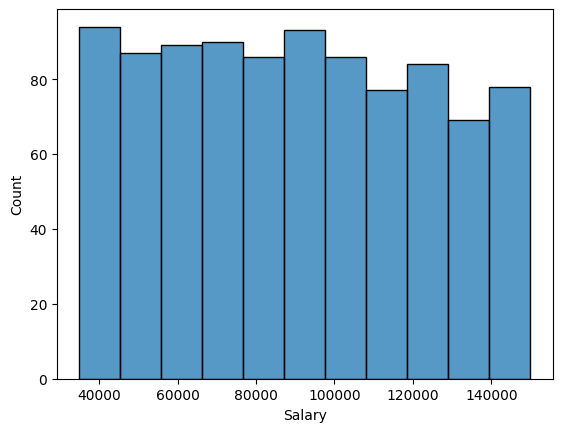

In [26]:
sns.histplot(x='Salary', data=df)
plt.show()

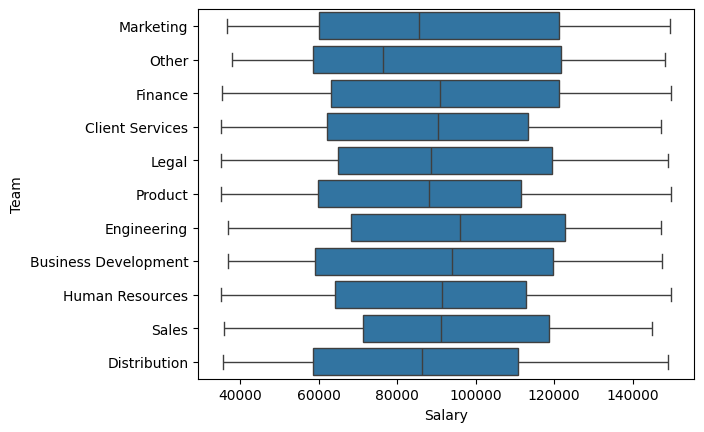

In [27]:
sns.boxplot(x="Salary", y='Team', data=df)
plt.show()

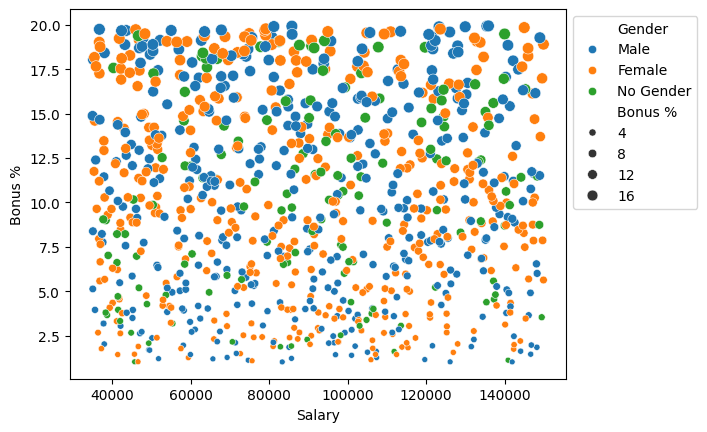

In [28]:
sns.scatterplot( x="Salary", y='Bonus %',hue='Gender', size='Bonus %', data=df)
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

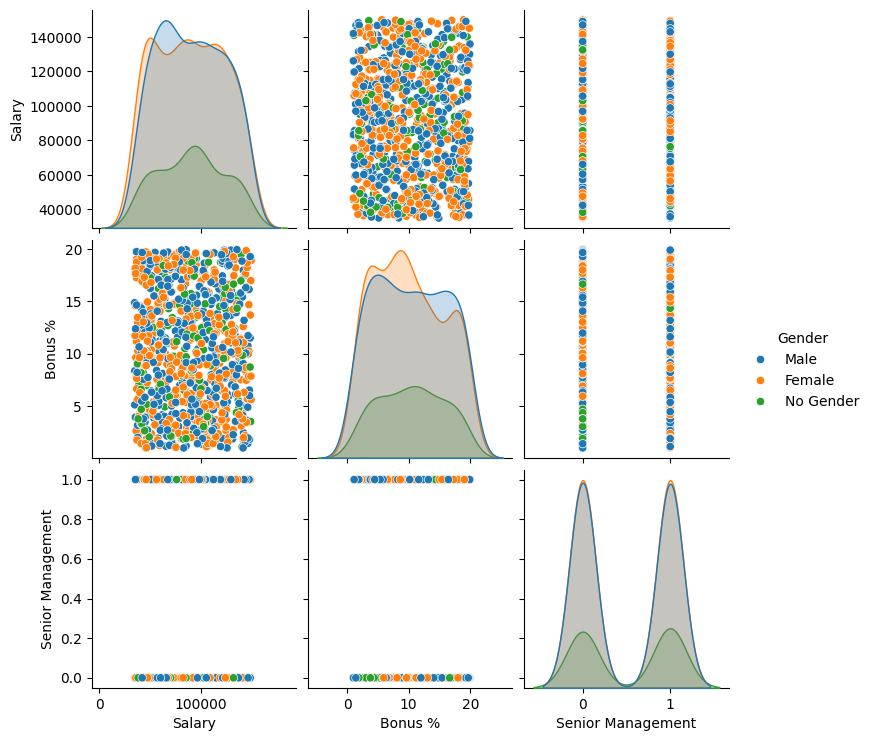

In [29]:
sns.pairplot(df, hue='Gender')
plt.show()